<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN With NHL Data

_Authors: Joseph Nelson (DC)_

---

Below you'll practice KNN classification on a data set of National Hockey League statistics.

You'll be predicting the `Rank` of a team using predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

### 1) Load the NHL data.

In [3]:
df = pd.read_csv(local_csv)
df.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


You can use the Legend on [www.nhl.com](http://www.nhl.com/stats/team?aggregate=0&gameType=3&report=teamsummary&reportType=season&seasonFrom=20162017&seasonTo=20162017&filter=gamesPlayed,gte,1&sort=points,wins) as a data dictionary reference.

Features that have a '60' in them are features that have been adjusted to represent averages over 60 minutes of game time.  
> A GF60 of 3.45 would indicate that the team averaged 3.45 goals per sixty minutes of Time on Ice (one regulation game).

### 2. Perform any required data cleaning. Do some EDA.

In [4]:
df.columns

Index([u'Team', u'PTS', u'Rank', u'TOI', u'GF', u'GA', u'GF60', u'GA60',
       u'GF%', u'SF', u'SA', u'SF60', u'SA60', u'SF%', u'FF', u'FA', u'FF60',
       u'FA60', u'FF%', u'CF', u'CA', u'CF60', u'CA60', u'CF%', u'Sh%', u'Sv%',
       u'PDO', u'PIM'],
      dtype='object')

In [5]:
df.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


### 3) Set up the `Rank` variable as your target. How many classes are there?

In [6]:
df['Rank'].unique()

array([1, 2, 3], dtype=int64)

### 4) What's the baseline accuracy?

In [7]:
print float(len(df[df['Rank'] == 1]))/len(df)
print float(len(df[df['Rank'] == 2]))/len(df)
print float(len(df[df['Rank'] == 3]))/len(df)
#baseline is 34%

0.322222222222
0.333333333333
0.344444444444


In [25]:
df['Rank'].value_counts()/len(df)

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

### 5) Choose four features as your predictor variables and set up your design matrix.

In [38]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so2 = pd.DataFrame(so).reset_index()
so2[so2[0] != 1.0]
sel = so2[(so2[0] != 1.0) & (so2['level_0'] == 'Rank')].head(10)

In [48]:
sel2 = sel['level_1'].values
sel2 = np.append(sel2, 'Rank')
df[sel2].corr()

,PTS,GF%,CF%,FF%,SF%,CA60,GA60,GA,SF60,FA60,Rank
PTS,1.000000,0.737442,0.594891,0.581731,0.569284,-0.512371,-0.587673,-0.578796,0.468253,-0.466330,-0.905004
GF%,0.737442,1.000000,0.564523,0.539240,0.554774,-0.381984,-0.716356,-0.747626,0.522118,-0.349842,-0.653633
CF%,0.594891,0.564523,1.000000,0.963224,0.925612,-0.785850,-0.410968,-0.361101,0.778101,-0.746783,-0.598466
FF%,0.581731,0.539240,0.963224,1.000000,0.971019,-0.780381,-0.391974,-0.327387,0.788091,-0.808367,-0.585340
SF%,0.569284,0.554774,0.925612,0.971019,1.000000,-0.748632,-0.382054,-0.320370,0.809392,-0.778591,-0.577347
CA60,-0.512371,-0.381984,-0.785850,-0.780381,-0.748632,1.000000,0.441831,0.364852,-0.352053,0.934904,0.537879
GA60,-0.587673,-0.716356,-0.410968,-0.391974,-0.382054,0.441831,1.000000,0.913963,-0.187607,0.421249,0.536279
GA,-0.578796,-0.747626,-0.361101,-0.327387,-0.320370,0.364852,0.913963,1.000000,-0.183025,0.331653,0.535782
SF60,0.468253,0.522118,0.778101,0.788091,0.809392,-0.352053,-0.187607,-0.183025,1.000000,-0.329785,-0.484563
FA60,-0.466330,-0.349842,-0.746783,-0.808367,-0.778591,0.934904,0.421249,0.331653,-0.329785,1.000000,0.477409


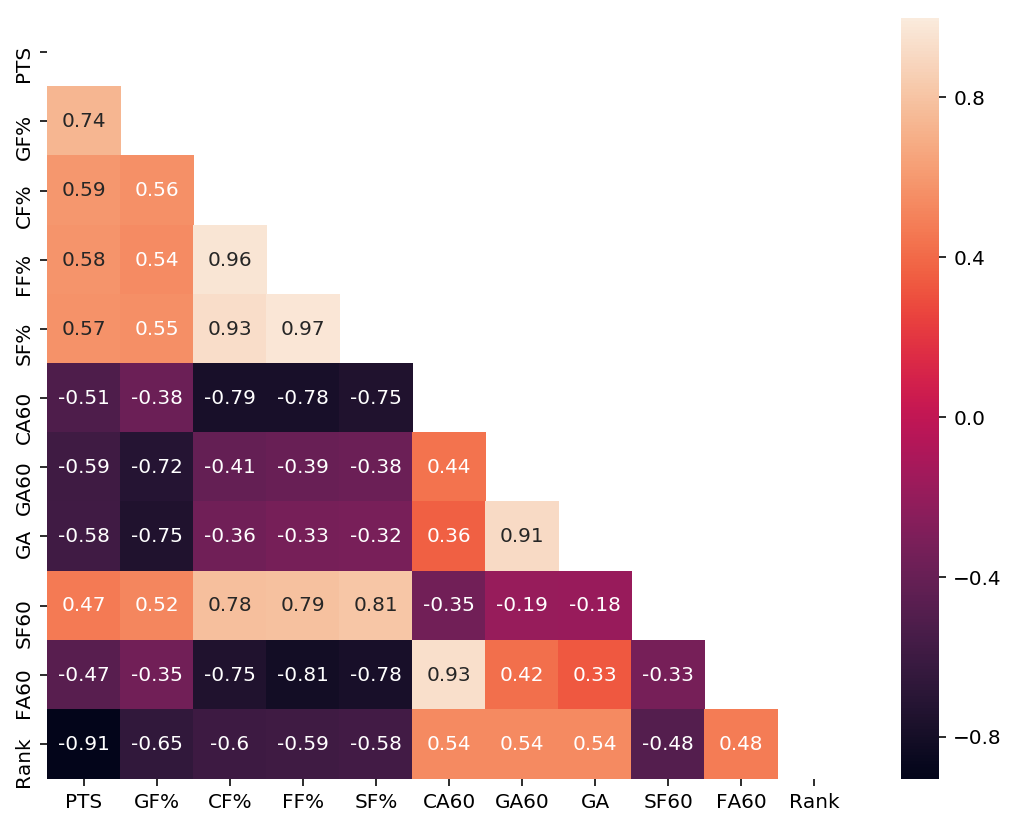

In [52]:
corr = df[sel2].corr()
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(9,7))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True)
# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)
# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()


In [53]:
selected = ['CF%', 'GF', 'Sh%', 'PDO']

In [55]:
y = df['Rank']
X = df[selected]

from sklearn.preprocessing import StandardScaler
Xs = StandardScaler().fit_transform(X)

In [56]:
from sklearn.model_selection import StratifiedKFold
#create stratified fold
skf = StratifiedKFold(n_splits=3)
indices = skf.split(X, y)
indices = [[tr,te] for tr, te in indices]

### 6) Fit a `KNeighborsClassifier` with one neighbor using the target and predictors.

In [57]:
y = df['Rank']
X = df[selected]

In [58]:
model = KNeighborsClassifier(n_neighbors=1).fit(X, y)
model.score(X, y)

1.0

In [11]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(len(indices)):
    model = KNeighborsClassifier(n_neighbors=1).fit(Xs[indices[i][0]], y[indices[i][0]])
    scores.append(model.score(Xs[indices[i][1]], y[indices[i][1]]))
print scores
print np.mean(scores)

[0.4838709677419355, 0.4666666666666667, 0.41379310344827586]
0.45477691261895936


### 7) Evaluate the accuracy of your model.
- Is it better than the baseline?
- Is it legitimate?

In [12]:
#it is better, not legitimate

### 8) Create a 50-50 train/test split of your target and predictors. Refit the KNN and assess the accuracy.

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=99)

In [60]:
model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [64]:
print model.score(X_test, y_test)

0.5111111111111111


In [66]:
y_pred_class = model.predict(X_test)
print y_pred_class

[3 2 3 3 3 2 3 2 2 2 2 1 3 3 1 3 3 2 2 3 2 1 1 1 1 1 2 1 2 2 3 1 3 1 2 3 3
 1 2 1 1 1 3 1 2]


### 9) Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [67]:
scores = []
for k in range(1,len(X_train)+1):
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

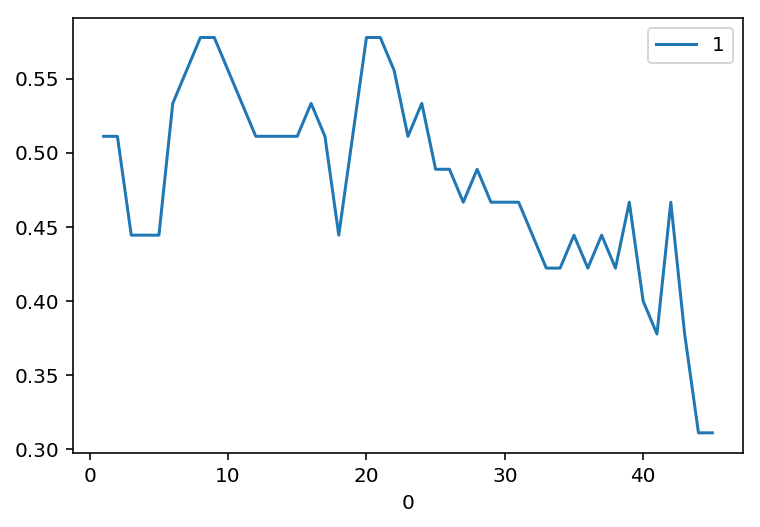

In [68]:
k = np.arange(1,60)
cv = pd.DataFrame(zip(k, scores))
cv.plot(x=0,y=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(len(indices)):
    model = KNeighborsClassifier(n_neighbors=len(Xs[indices[i][0]])).fit(Xs[indices[i][0]], y[indices[i][0]])
    scores.append(model.score(Xs[indices[i][1]], y[indices[i][1]]))
print scores
print np.mean(scores)

[0.3225806451612903, 0.3333333333333333, 0.3448275862068966]
0.33358052156717344


### 10) Fit the KNN at values of K from one to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy versus the number of neighbors.

In [69]:
from sklearn.model_selection import StratifiedKFold
#create stratified fold
skf = StratifiedKFold(n_splits=3)
indices = skf.split(X, y)
indices = [[tr,te] for tr, te in indices]

In [82]:
cv_scores = []
for k in range(1,len(indices[i][0])-1):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = []
    for i in range(3):
        model.fit(X.iloc[indices[i][0]], y[indices[i][0]])
        scores.append(model.score(X.iloc[indices[i][1]], y[indices[i][1]]))
    cv_scores.append(scores)

In [72]:
for i in range(3):
        model.fit(Xs[indices[i][0]], y[indices[i][0]])
        scores.append(model.score(Xs[indices[i][1]], y[indices[i][1]]))

In [83]:
avg_k_score = [np.mean(scores) for scores in cv_scores]

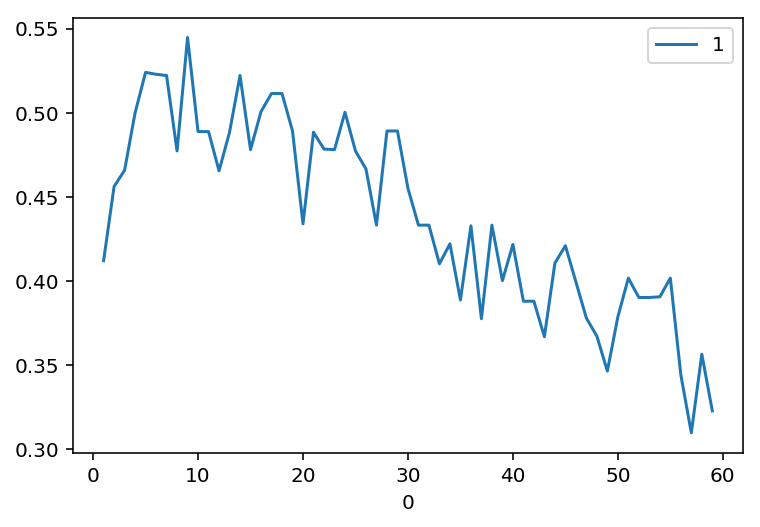

In [84]:
k = np.arange(1,60)
cv = pd.DataFrame(zip(k, avg_k_score))
cv.plot(x=0,y=1)

### 11) Fit KNN across different values of K and plot the mean cross-validated accuracy with five folds.

In [23]:
cv_scores = []
for i in range(3):
    k_scores = []
    for k in range(1,len(indices[i][0])):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Xs[indices[i][0]], y[indices[i][0]])
        k_scores.append(model.score(Xs[indices[i][1]], y[indices[i][1]]))
    cv_scores.append(k_scores)

In [24]:
cvlist = []
for j in range(60):
    list = []
    for i in range(3):
        list.append(cv_scores[i][j])
cvlist.append(np.mean(list))

IndexError: list index out of range

In [ ]:
cvlist

### 12) Standardize the predictor matrix and cross-validate across the different K values.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [ ]:
# A: